Breadth First Search

In [1]:
# Loading the library
import re
import pandas as pd
import numpy as np
import random 
import string 
import time as t
import matplotlib.pyplot as plt
from collections import deque
import networkx as nx

In [2]:
# define BFS function which prints the recommended path
def bfs(graph, start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

# give the path of graph from starting to the goal part
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

In [3]:
def generate_edges(graph):
    edges = []
    for node in graph:
        for neighbour in graph[node]:
            edges.append((node, neighbour))

    return edges

In [4]:
# Creatrion of graph
graph = { "a" : ["b","c", "d", "e", "f"],
          "b" : [ "k","l", "m", "n", "o"],
          "c" : [ "p", "q", "r", "s", "t"],
          "d" : ["u", "v", "w", "x", "y"],
          "e" : ["z", "aa", "bb", "cc", "dd"],
          "f" :["ee", "ff", "gg", "hh", "ii"],
           "k" : ["jj", "kk", "ll", "mm", "nn"],
            "l": ["jj", "kk", "mm", "oo","pp"],
         "m" :["mm","oo","pp", "qq", "rr"],
         "n" :["pp", "qq", "rr", "ss", "tt"],
         "o" : ["uu", "vv", "rr", "ss", "qq"],
         "p" : ["uu","vv","ww", "xx","yy"],
         "q" : ["ww", "xx","aaa","bbb","ccc"],
         "r" : ["aaa", "bbb", "ccc","ddd"],
         "s" : ["ccc", "ddd","eee", "fff","ggg"],
         "t" : ["fff", "ggg", "hhh", "iii", "jjj"],
         "u" : ["hhh", "iii", "jjj", "kkk", "lll"],
         "v" : ["kkk", "lll","mmm", "nnn", "ooo" ],
         "w" : ["mmm", "nnn", "ooo", "ppp", "qqq"],
         "x" : ["ooo", "ppp", "qqq", "rrr", "sss"],
         "y" : ["qqq", "rrr", "sss", "ttt", "uuu"],
         "z" : ["sss", "ttt", "uuu", "www", "xxx"],
         "aa" : ["aaaa", "bbbb", "cccc", "dddd","eeee" ],
         "bb" : ["cccc", "dddd","eeee" , "ffff", "gggg"],
         "cc" : ["dddd","eeee" , "ffff", "gggg", "hhhh"],
         "dd" : ["ffff", "gggg", "hhhh", "iiii", "jjjj"],
         "ee" : ["hhhh", "iiii", "jjjj", "kkkk", "llll"],
         "ff" : ["iiii", "jjjj", "kkkk", "llll", "mmmm"],
         "gg" : ["jjjj", "kkkk", "llll", "mmmm", "nnnn"],
         "hh" : ["kkkk", "llll", "mmmm", "nnnn", "oooo"],
         "ii" : ["llll", "mmmm", "nnnn", "oooo", "pppp"],
        "jj":["mmmm", "nnnn", "oooo", "pppp", "rrrr"],
         "kk" : ["nnnn", "oooo", "pppp", "rrrr", "ssss"],
         "ll" :["oooo", "pppp", "rrrr", "ssss", "tttt"],
         "mm" :["pppp", "rrrr", "ssss", "tttt", "qqqq"],
         "nn":["rrrr", "ssss", "tttt", "uuuu", "vvvv"],
         "oo" :["ssss", "tttt", "uuuu", "vvvv", "wwww"],
         "pp":["tttt", "uuuu", "vvvv", "wwww", "xxxx"],
         "qq":["uuuu", "vvvv", "wwww", "xxxx", "yyyy"],
         "rr":["vvvv", "wwww", "xxxx", "yyyy", "zzzz"],
         "ss":["aaaaa", "bbbbb", "ccccc", "ddddd","fffff"],
         "tt":[ "bbbbb", "ccccc", "eeeee","fffff", "ggggg"],
         "uu":["ccccc", "eeeee","fffff", "ggggg", "hhhhh"],
         "vv":["eeeee","fffff", "ggggg", "hhhhh", "iiiii"],
         "ww": ["fffff", "ggggg", "hhhhh", "iiiii", "jjjjj"],
         "xx":[ "ggggg", "hhhhh", "iiiii", "jjjjj", "kkkkk"],
         "yy":["hhhhh", "iiiii", "jjjjj", "kkkkk", "lllll"],
         "zz": ["iiiii", "jjjjj", "kkkkk", "lllll", "mmmmm"],
         "aaa" : [ "jjjjj", "kkkkk", "lllll", "mmmmm", "nnnnn"],
         "bbb" : ["kkkkk", "lllll", "mmmmm", "nnnnn","ooooo"],
         "ccc" : ["lllll", "mmmmm", "nnnnn","ooooo", "ppppp"],
         "ddd" : ["mmmmm", "nnnnn","ooooo", "ppppp", "qqqqq"],
         "eee" : ["nnnnn","ooooo", "ppppp", "rrrrr", "sssss"],
         "fff" : ["ooooo", "ppppp", "rrrrr", "sssss", "uuuuu"],
         "ggg" : ["ppppp", "rrrrr", "sssss", "ttttt", "vvvvv"],
         "hhh" : ["rrrrr", "sssss", "uuuuu", "vvvvv", "wwwww"],
         "iii" : ["sssss", "uuuuu", "vvvvv", "wwwww", "xxxxx"],
        "jjj":["uuuuu", "vvvvv", "wwwww", "xxxxx", "yyyyy"],
         "kkk" : ["vvvvv", "wwwww", "xxxxx", "yyyyy", "zzzzz"],
         "lll" :["wwwww", "xxxxx", "yyyyy", "zzzzz", "aaaaaa"],
         "mmm" :[ "xxxxx", "yyyyy", "zzzzz", "aaaaaa", "bbbbbb"],
         "nnn":[ "yyyyy", "zzzzz", "aaaaaa", "bbbbbb", "cccccc"],
         "ooo" :[ "zzzzz", "aaaaaa", "bbbbbb", "cccccc", "dddddd"],
         "ppp":["aaaaaa", "bbbbbb", "cccccc", "dddddd", "eeeeee"],
         "qqq":["bbbbbb", "cccccc", "dddddd", "eeeeee", "ffffff"],
         "rrr":["cccccc", "dddddd", "eeeeee", "ffffff", "gggggg"],
         "sss":["dddddd", "eeeeee", "ffffff", "gggggg", "hhhhhh"],
         "ttt":["eeeeee", "ffffff", "gggggg", "hhhhhh", "iiiiii"],
         "uuu":["ffffff", "gggggg", "hhhhhh", "iiiiii","jjjjjj"],
         "vvv":["gggggg", "hhhhhh", "iiiiii","jjjjjj", "kkkkkk"],
         "www": ["hhhhhh", "iiiiii","jjjjjj", "kkkkkk", "llllll"],
         "xxx":["iiiiii","jjjjjj", "kkkkkk", "llllll", "mmmmmm"],
         "yyy":["jjjjjj", "kkkkkk", "llllll", "mmmmmm","nnnnnn"],
         "zzz": ["kkkkkk", "llllll", "mmmmmm","nnnnnn", "oooooo"],
         "aaaa" : ["llllll", "mmmmmm","nnnnnn", "oooooo", "ppppp"],
         "bbbb" : ["mmmmmm","nnnnnn", "oooooo", "ppppp", "qqqqqq"],
         "cccc" : ["nnnnnn", "oooooo", "ppppp", "qqqqqq", "rrrrrr"],
         "dddd" : [ "oooooo", "pppppp", "qqqqqq", "rrrrrr", "ssssss"],
         "eeee" : [ "pppppp", "qqqqqq", "rrrrrr", "ssssss", "tttttt"],
         "ffff" : ["qqqqqq", "rrrrrr", "ssssss", "tttttt", "uuuuuu"],
         "gggg" : [ "rrrrrr", "ssssss", "tttttt", "uuuuuu", "wwwwww"],
         "hhhh" : ["ssssss", "tttttt", "uuuuuu", "vvvvvv", "xxxxxx"],
         "iiii" : [ "tttttt", "uuuuuu", "wwwwww", "xxxxxx", "yyyyyy"],
        "jjjj":[ "uuuuuu", "wwwwww", "xxxxxx", "yyyyyy", "zzzzzz"],
         "kkkk" : [],
         "llll" :[],
         "mmmm" :[],
         "nnnn":[],
         "oooo" :[],
         "pppp":[],
         "qqqq":[],
         "rrrr":[],
         "ssss":[],
         "tttt":[],
         "uuuu":[],
         "vvvv":[],
         "wwww": [],
         "xxxx":[],
         "yyyy":[],
         "zzzz": [],
         "aaaaa" : [],
         "bbbbb" : [],
         "ccccc" : [],
         "ddddd" : [],
         "eeeee" : [],
         "fffff" : [],
         "ggggg" : [],
         "hhhhh" : [],
         "iiiii" : [],
        "jjjjj":[],
         "kkkkk" : [],
         "lllll" :[],
         "mmmmm" :[],
         "nnnnn":[],
         "ooooo" :[],
         "ppppp":[],
         "qqqqq":[],
         "rrrrr":[],
         "sssss":[],
         "ttttt":[],
         "uuuuu":[],
         "vvvvv":[],
         "wwwww": [],
         "xxxxx":[],
         "yyyyy":[],
         "zzzzz": [],
         "aaaaaa" : [],
         "bbbbbb" : [],
         "cccccc" : [],
         "dddddd" : [],
         "eeeeee" : [],
         "ffffff" : [],
         "gggggg" : [],
         "hhhhhh" : [],
         "iiiiii" : [],
        "jjjjjj":[],
         "kkkkkk" : [],
         "llllll" :[],
         "mmmmmm" :[],
         "nnnnnn":[],
         "oooooo" :[],
         "pppppp":[],
         "qqqqqq":[],
         "rrrrrr":[],
         "ssssss":[],
         "tttttt":[],
         "uuuuuu":[],
         "vvvvvv":[],
         "wwwwww": [],
         "xxxxxx":[],
         "yyyyyy":[],
         "zzzzzz": []
         
         }

In [5]:
graph = { "a" : set(["b","c", "d", "e", "f"]),
          "b" : set([ "k","l", "m", "n", "o"]),
          "c" : set([ "p", "q", "r", "s", "t"]),
          "d" : set(["u", "v", "w", "x", "y"]),
          "e" : set(["z", "aa", "bb", "cc", "dd"]),
          "f" :set(["ee", "ff", "gg", "hh", "ii"]),
           "k" : set(["jj", "kk", "ll", "mm", "nn"]),
            "l": set(["jj", "kk", "mm", "oo","pp"]),
         "m" :set(["mm","oo","pp", "qq", "rr"]),
         "n" :set(["pp", "qq", "rr", "ss", "tt"]),
         "o" : set(["uu", "vv", "rr", "ss", "qq"]),
         "p" : set(["uu","vv","ww", "xx","yy"]),
         "q" : set(["ww", "xx","aaa","bbb","ccc"]),
         "r" : set(["aaa", "bbb", "ccc","ddd"]),
         "s" : set(["ccc", "ddd","eee", "fff","ggg"]),
         "t" : set(["fff", "ggg", "hhh", "iii", "jjj"]),
         "u" : set(["hhh", "iii", "jjj", "kkk", "lll"]),
         "v" : set(["kkk", "lll","mmm", "nnn", "ooo" ]),
         "w" : set(["mmm", "nnn", "ooo", "ppp", "qqq"]),
         "x" : set(["ooo", "ppp", "qqq", "rrr", "sss"]),
         "y" : set(["qqq", "rrr", "sss", "ttt", "uuu"]),
         "z" : set(["sss", "ttt", "uuu", "www", "xxx"]),
         "aa" : set(["aaaa", "bbbb", "cccc", "dddd","eeee" ]),
         "bb" : set(["cccc", "dddd","eeee" , "ffff", "gggg"]),
         "cc" : set(["dddd","eeee" , "ffff", "gggg", "hhhh"]),
         "dd" : set(["ffff", "gggg", "hhhh", "iiii", "jjjj"]),
         "ee" : set(["hhhh", "iiii", "jjjj", "kkkk", "llll"]),
         "ff" : set(["iiii", "jjjj", "kkkk", "llll", "mmmm"]),
         "gg" : set(["jjjj", "kkkk", "llll", "mmmm", "nnnn"]),
         "hh" : set(["kkkk", "llll", "mmmm", "nnnn", "oooo"]),
         "ii" : set(["llll", "mmmm", "nnnn", "oooo", "pppp"]),
        "jj":set(["mmmm", "nnnn", "oooo", "pppp", "rrrr"]),
         "kk" : set(["nnnn", "oooo", "pppp", "rrrr", "ssss"]),
         "ll" :set(["oooo", "pppp", "rrrr", "ssss", "tttt"]),
         "mm" :set(["pppp", "rrrr", "ssss", "tttt", "qqqq"]),
         "nn":set(["rrrr", "ssss", "tttt", "uuuu", "vvvv"]),
         "oo" :set(["ssss", "tttt", "uuuu", "vvvv", "wwww"]),
         "pp":set(["tttt", "uuuu", "vvvv", "wwww", "xxxx"]),
         "qq":set(["uuuu", "vvvv", "wwww", "xxxx", "yyyy"]),
         "rr":set(["vvvv", "wwww", "xxxx", "yyyy", "zzzz"]),
         "ss":set(["aaaaa", "bbbbb", "ccccc", "ddddd","fffff"]),
         "tt":set([ "bbbbb", "ccccc", "eeeee","fffff", "ggggg"]),
         "uu":set(["ccccc", "eeeee","fffff", "ggggg", "hhhhh"]),
         "vv":set(["eeeee","fffff", "ggggg", "hhhhh", "iiiii"]),
         "ww": set(["fffff", "ggggg", "hhhhh", "iiiii", "jjjjj"]),
         "xx":set([ "ggggg", "hhhhh", "iiiii", "jjjjj", "kkkkk"]),
         "yy":set(["hhhhh", "iiiii", "jjjjj", "kkkkk", "lllll"]),
         "zz": set(["iiiii", "jjjjj", "kkkkk", "lllll", "mmmmm"]),
         "aaa" : set([ "jjjjj", "kkkkk", "lllll", "mmmmm", "nnnnn"]),
         "bbb" : set(["kkkkk", "lllll", "mmmmm", "nnnnn","ooooo"]),
         "ccc" : set(["lllll", "mmmmm", "nnnnn","ooooo", "ppppp"]),
         "ddd" : set(["mmmmm", "nnnnn","ooooo", "ppppp", "qqqqq"]),
         "eee" : set(["nnnnn","ooooo", "ppppp", "rrrrr", "sssss"]),
         "fff" : set(["ooooo", "ppppp", "rrrrr", "sssss", "uuuuu"]),
         "ggg" : set(["ppppp", "rrrrr", "sssss", "ttttt", "vvvvv"]),
         "hhh" : set(["rrrrr", "sssss", "uuuuu", "vvvvv", "wwwww"]),
         "iii" : set(["sssss", "uuuuu", "vvvvv", "wwwww", "xxxxx"]),
        "jjj":set(["uuuuu", "vvvvv", "wwwww", "xxxxx", "yyyyy"]),
         "kkk" : set(["vvvvv", "wwwww", "xxxxx", "yyyyy", "zzzzz"]),
         "lll" :set(["wwwww", "xxxxx", "yyyyy", "zzzzz", "aaaaaa"]),
         "mmm" :set([ "xxxxx", "yyyyy", "zzzzz", "aaaaaa", "bbbbbb"]),
         "nnn":set([ "yyyyy", "zzzzz", "aaaaaa", "bbbbbb", "cccccc"]),
         "ooo" :set([ "zzzzz", "aaaaaa", "bbbbbb", "cccccc", "dddddd"]),
         "ppp":set(["aaaaaa", "bbbbbb", "cccccc", "dddddd", "eeeeee"]),
         "qqq":set(["bbbbbb", "cccccc", "dddddd", "eeeeee", "ffffff"]),
         "rrr":set(["cccccc", "dddddd", "eeeeee", "ffffff", "gggggg"]),
         "sss":set(["dddddd", "eeeeee", "ffffff", "gggggg", "hhhhhh"]),
         "ttt":set(["eeeeee", "ffffff", "gggggg", "hhhhhh", "iiiiii"]),
         "uuu":set(["ffffff", "gggggg", "hhhhhh", "iiiiii","jjjjjj"]),
         "vvv":set(["gggggg", "hhhhhh", "iiiiii","jjjjjj", "kkkkkk"]),
         "www": set(["hhhhhh", "iiiiii","jjjjjj", "kkkkkk", "llllll"]),
         "xxx":set(["iiiiii","jjjjjj", "kkkkkk", "llllll", "mmmmmm"]),
         "yyy":set(["jjjjjj", "kkkkkk", "llllll", "mmmmmm","nnnnnn"]),
         "zzz": set(["kkkkkk", "llllll", "mmmmmm","nnnnnn", "oooooo"]),
         "aaaa" : set(["llllll", "mmmmmm","nnnnnn", "oooooo", "ppppp"]),
         "bbbb" : set(["mmmmmm","nnnnnn", "oooooo", "ppppp", "qqqqqq"]),
         "cccc" : set(["nnnnnn", "oooooo", "ppppp", "qqqqqq", "rrrrrr"]),
         "dddd" : set([ "oooooo", "pppppp", "qqqqqq", "rrrrrr", "ssssss"]),
         "eeee" : set([ "pppppp", "qqqqqq", "rrrrrr", "ssssss", "tttttt"]),
         "ffff" : set(["qqqqqq", "rrrrrr", "ssssss", "tttttt", "uuuuuu"]),
         "gggg" : set([ "rrrrrr", "ssssss", "tttttt", "uuuuuu", "wwwwww"]),
         "hhhh" : set(["ssssss", "tttttt", "uuuuuu", "vvvvvv", "xxxxxx"]),
         "iiii" : set([ "tttttt", "uuuuuu", "wwwwww", "xxxxxx", "yyyyyy"]),
        "jjjj":set([ "uuuuuu", "wwwwww", "xxxxxx", "yyyyyy", "zzzzzz"]),
         "kkkk" : set([]),
         "llll" :set([]),
         "mmmm" :set([]),
         "nnnn":set([]),
         "oooo" :set([]),
         "pppp":set([]),
         "qqqq":set([]),
         "rrrr":set([]),
         "ssss":set([]),
         "tttt":set([]),
         "uuuu":set([]),
         "vvvv":set([]),
         "wwww": set([]),
         "xxxx":set([]),
         "yyyy":set([]),
         "zzzz": set([]),
         "aaaaa" : set([]),
         "bbbbb" : set([]),
         "ccccc" : set([]),
         "ddddd" : set([]),
         "eeeee" : set([]),
         "fffff" : set([]),
         "ggggg" : set([]),
         "hhhhh" : set([]),
         "iiiii" : set([]),
        "jjjjj":set([]),
         "kkkkk" : set([]),
         "lllll" :set([]),
         "mmmmm" :set([]),
         "nnnnn":set([]),
         "ooooo" :set([]),
         "ppppp":set([]),
         "qqqqq":set([]),
         "rrrrr":set([]),
         "sssss":set([]),
         "ttttt":set([]),
         "uuuuu":set([]),
         "vvvvv":set([]),
         "wwwww": set([]),
         "xxxxx":set([]),
         "yyyyy":set([]),
         "zzzzz": set([]),
         "aaaaaa" : set([]),
         "bbbbbb" : set([]),
         "cccccc" : set([]),
         "dddddd" : set([]),
         "eeeeee" : set([]),
         "ffffff" : set([]),
         "gggggg" : set([]),
         "hhhhhh" : set([]),
         "iiiiii" : set([]),
        "jjjjjj":set([]),
         "kkkkkk" : set([]),
         "llllll" :set([]),
         "mmmmmm" :set([]),
         "nnnnnn":set([]),
         "oooooo" :set([]),
         "pppppp":set([]),
         "qqqqqq":set([]),
         "rrrrrr":set([]),
         "ssssss":set([]),
         "tttttt":set([]),
         "uuuuuu":set([]),
         "vvvvvv":set([]),
         "wwwwww": set([]),
         "xxxxxx":set([]),
         "yyyyyy":set([]),
         "zzzzzz": set([])
         
         }

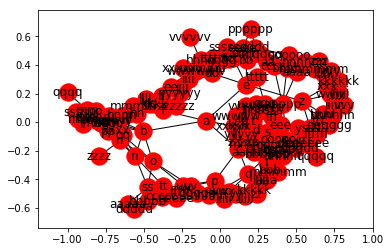

In [6]:
#Plotting the graph
G = nx.Graph(graph)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [7]:
# Finding the edges of the graph
generate_edges(graph)

[('a', 'c'),
 ('a', 'b'),
 ('a', 'e'),
 ('a', 'f'),
 ('a', 'd'),
 ('b', 'm'),
 ('b', 'k'),
 ('b', 'l'),
 ('b', 'o'),
 ('b', 'n'),
 ('c', 'p'),
 ('c', 's'),
 ('c', 't'),
 ('c', 'r'),
 ('c', 'q'),
 ('d', 'y'),
 ('d', 'x'),
 ('d', 'w'),
 ('d', 'u'),
 ('d', 'v'),
 ('e', 'cc'),
 ('e', 'z'),
 ('e', 'bb'),
 ('e', 'aa'),
 ('e', 'dd'),
 ('f', 'gg'),
 ('f', 'hh'),
 ('f', 'ii'),
 ('f', 'ff'),
 ('f', 'ee'),
 ('k', 'nn'),
 ('k', 'jj'),
 ('k', 'kk'),
 ('k', 'll'),
 ('k', 'mm'),
 ('l', 'oo'),
 ('l', 'pp'),
 ('l', 'jj'),
 ('l', 'kk'),
 ('l', 'mm'),
 ('m', 'qq'),
 ('m', 'oo'),
 ('m', 'pp'),
 ('m', 'rr'),
 ('m', 'mm'),
 ('n', 'tt'),
 ('n', 'ss'),
 ('n', 'qq'),
 ('n', 'pp'),
 ('n', 'rr'),
 ('o', 'ss'),
 ('o', 'qq'),
 ('o', 'uu'),
 ('o', 'vv'),
 ('o', 'rr'),
 ('p', 'yy'),
 ('p', 'uu'),
 ('p', 'vv'),
 ('p', 'xx'),
 ('p', 'ww'),
 ('q', 'ccc'),
 ('q', 'aaa'),
 ('q', 'bbb'),
 ('q', 'xx'),
 ('q', 'ww'),
 ('r', 'bbb'),
 ('r', 'aaa'),
 ('r', 'ccc'),
 ('r', 'ddd'),
 ('s', 'ccc'),
 ('s', 'eee'),
 ('s', 'fff'),
 ('

In [8]:
# Testing search
bfs(graph, 'aaaaaa')

{'aaaaaa'}

In [9]:
# Calculating the time for each graph time
def calc_time(graph,name):
    start = t.clock()
    bfs(graph, name)
    end = t.clock()
    return round((end-start),6)

In [11]:
Frst_Layer = calc_time(graph, 'a')
Scnd_Layer = calc_time(graph, 'aa')
Third_Layer = calc_time(graph, 'aaa')
Forth_Layer = calc_time(graph, 'aaaa')
Fifth_Layer = calc_time(graph, 'aaaaa')

Frst_Layer, Scnd_Layer, Third_Layer, Forth_Layer, Fifth_Layer

(0.000242, 1.9e-05, 8e-06, 6e-06, 1e-06)

In [13]:
time_stemp_data_1= pd.DataFrame({"Layers":['First Layer', 'Second Layer', 'Third Layer', 'Forth Layer','Fifth Layer'],
                                "Time" : [Frst_Layer, Scnd_Layer, Third_Layer, Forth_Layer, Fifth_Layer]})

time_stemp_data_1

,Layers,Time
0,First Layer,0.000242
1,Second Layer,0.000019
2,Third Layer,0.000008
3,Forth Layer,0.000006
4,Fifth Layer,0.000001


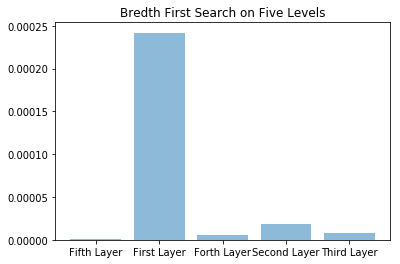

In [14]:
# Plotting Data
plt.bar(time_stemp_data_1['Layers'], time_stemp_data_1['Time'], align='center', alpha=0.5)
plt.title("Bredth First Search on Five Levels")
plt.show()